In [60]:
import random 
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [61]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'

In [62]:
df = pd.read_csv(path)

In [63]:
df.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [64]:
#here we are removing the parameter like address this is because it is a categorical parameter

In [65]:
df = df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [66]:
#here the term axis is used to so that particular coulmn is used


In [67]:
X = df[['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']]

In [68]:
X = np.nan_to_num(X)

In [69]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [70]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 1 2 0 0 2 2 2 0 1 2 2 2 1 2 2 2 0 2 2 2 1 0 0 2 2 2 2 2 2 0 1 2 2 2 1
 1 2 0 1 0 2 0 2 0 2 2 2 2 0 0 1 2 1 1 1 2 2 2 0 2 0 0 2 2 2 1 2 1 2 2 2 2
 2 2 2 2 0 2 2 1 0 2 0 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 1 0 2 1 1 0 2 2 2 2 2
 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 0 2 2 1
 2 2 2 0 1 2 2 2 2 0 1 1 2 0 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 2 1 0 1 2 2 0 1
 0 2 2 2 2 2 0 2 1 2 2 2 0 0 2 0 2 1 2 2 1 2 0 2 1 2 2 2 2 2 1 1 0 2 2 1 0
 2 2 2 2 0 2 2 1 2 2 2 2 0 2 2 1 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 1 2 1 2
 2 2 0 2 1 0 1 2 0 2 2 1 2 2 2 2 1 1 1 2 2 2 0 2 2 0 2 0 2 2 0 2 2 2 1 2 2
 1 2 1 0 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 1 0 2 1 2 2 2 1 1 2 2 2 0 1
 2 2 1 2 0 2 2 2 2 2 1 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 1 2 1 2 2 2 0 0 2
 1 2 0 1 1 2 2 2 1 2 2 2 2 2 0 2 0 2 2 2 2 1 2 1 2 2 2 0 2 2 2 2 1 2 2 1 1
 0 2 2 2 2 2 1 1 2 0 1 0 2 2 1 2 2 0 0 2 1 2 2 0 2 1 2 0 2 2 2 0 2 2 2 2 0
 2 1 2 2 2 2 0 1 2 2 0 2 1 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 2 0 2 1 2 2 2 1 2
 1 2 2 2 2 2 0 1 1 2 0 2 

In [71]:
#data visvulization(google the default parameters which fit alomost all data for example the value of elevation etc)

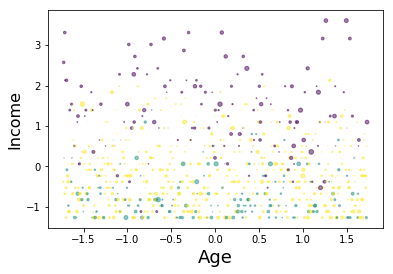

In [72]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


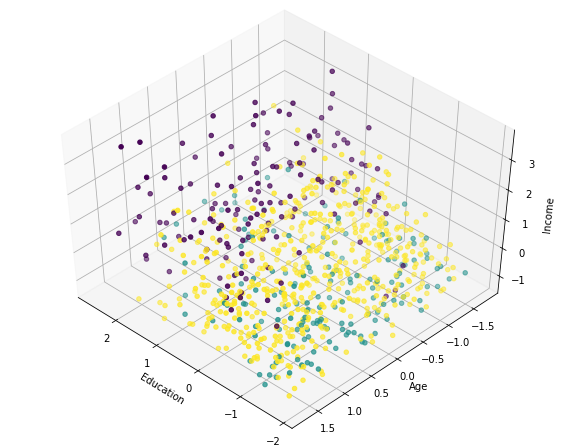

In [73]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))